### Max Fine July 1 2024

This notebook is using `fitburst` modeling of the example chime data I was given already in `.npy` format

In [23]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import json


# from fitburst we need the following:
import fitburst # the fitburst package
from fitburst.analysis.peak_finder import FindPeak
from fitburst.backend.generic import DataReader
from fitburst.analysis.fitter import LSFitter
from fitburst.analysis.model import SpectrumModeler
import fitburst.utilities as ut

data_dir = 'npyarrays_chime/npyarrays_chime'

In [2]:
cd npyarrays_chime/npyarrays_chime

/home/afinemax/afinemax/khazad-dum/research/astron_2024/frb_example_data_june_2024/npyarrays_chime/npyarrays_chime


In [3]:
ls

 burst_parameters.csv           'FRB 20190425B_burst_data.npy'
'FRB 20181209A_burst_data.npy'  'FRB 20190427A_burst_data.npy'
'FRB 20181209Awaterfall.png'    'FRB 20190430C_burst_data.npy'
'FRB 20181213A_burst_data.npy'  'FRB 20190501B_burst_data.npy'
'FRB 20181214C_burst_data.npy'  'FRB 20190502A_burst_data.npy'
'FRB 20181214Cwaterfall.png'    'FRB 20190502B_burst_data.npy'
'FRB 20181215B_burst_data.npy'  'FRB 20190502C_burst_data.npy'
'FRB 20181219C_burst_data.npy'  'FRB 20190517C_burst_data.npy'
'FRB 20181220A_burst_data.npy'  'FRB 20190518C_burst_data.npy'
'FRB 20181221A_burst_data.npy'  'FRB 20190519E_burst_data.npy'
'FRB 20181221B_burst_data.npy'  'FRB 20190519H_burst_data.npy'
'FRB 20181222E_burst_data.npy'  'FRB 20190604G_burst_data.npy'
'FRB 20181223C_burst_data.npy'  'FRB 20190605A_burst_data.npy'
'FRB 20181224E_burst_data.npy'  'FRB 20190605B_burst_data.npy'
'FRB 20181225A_burst_data.npy'  'FRB 20190605C_burst_data.npy'
'FRB 20181226A_burst_data.npy'  'FRB 20190606B_burst_da

In [5]:
# load csv file into a pandas df, and load the numpy files 
csv = 'burst_parameters.csv'
burst_parameters = pd.read_csv(csv)

# show burst parameters df
burst_parameters

,BurstName,DownFactor,Window_time,ToFillChannelsIndices
0,FRB 20181209A,8,20,"[0, 2, 5, 10, 14, 20, 33, 50, 52, 63, 64, 71, ..."
1,FRB 20181213A,8,20,"[0, 2, 5, 10, 14, 20, 33, 50, 52, 54, 63, 64, ..."
2,FRB 20181214C,16,40,"[0, 2, 5, 10, 14, 20, 30, 33, 46, 50, 52, 54, ..."
3,FRB 20181215B,4,10,"[0, 2, 5, 10, 13, 14, 15, 16, 20, 22, 23, 24, ..."
4,FRB 20181219C,16,40,"[0, 2, 5, 10, 14, 20, 30, 33, 46, 50, 52, 57, ..."
...,...,...,...,...
99,FRB 20190630D,8,20,"[0, 39, 42, 52, 63, 64, 72, 81, 82, 110, 113, ..."
100,FRB 20190701A,4,10,"[0, 39, 42, 52, 63, 64, 72, 81, 82, 110, 114, ..."
101,FRB 20190701B,4,10,"[0, 39, 42, 52, 63, 64, 72, 81, 82, 92, 110, 1..."
102,FRB 20190701C,16,40,"[0, 12, 39, 42, 52, 54, 63, 64, 72, 81, 82, 11..."


In [6]:
# create list of file names (str) of the data dir to open the .npy files
# o it looks like we could just use the BurstName col from the df, and then append a suffix

cwd = os.getcwd()
# List all files in the current working directory
files = [f for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f))]

index = files.index(csv) # remove the .csv file
files.pop(index)

print(files) # print 

['FRB 20181223C_burst_data.npy', 'FRB 20190417C_burst_data.npy', 'FRB 20181226D_burst_data.npy', 'FRB 20190430C_burst_data.npy', 'FRB 20181209Awaterfall.png', 'FRB 20190427A_burst_data.npy', 'FRB 20190607B_burst_data.npy', 'FRB 20190628A_burst_data.npy', 'FRB 20190609A_burst_data.npy', 'FRB 20190224C_burst_data.npy', 'FRB 20190701B_burst_data.npy', 'FRB 20190701A_burst_data.npy', 'FRB 20190519E_burst_data.npy', 'FRB 20190701D_burst_data.npy', 'FRB 20190412A_burst_data.npy', 'FRB 20190502B_burst_data.npy', 'FRB 20190614A_burst_data.npy', 'FRB 20190617C_burst_data.npy', 'FRB 20181215B_burst_data.npy', 'FRB 20190327A_burst_data.npy', 'FRB 20190621B_burst_data.npy', 'FRB 20190624B_burst_data.npy', 'FRB 20190226A_burst_data.npy', 'FRB 20190616A_burst_data.npy', 'FRB 20190519H_burst_data.npy', 'FRB 20190110A_burst_data.npy', 'FRB 20181228B_burst_data.npy', 'FRB 20190619B_burst_data.npy', 'FRB 20190418A_burst_data.npy', 'FRB 20190111B_burst_data.npy', 'FRB 20190518C_burst_data.npy', 'FRB 2019

### Dict to map names to file

In [9]:
# make a dict? mapping the Burstname collum to the loaded in .npy files
# actually we are going to be doing this with the BurstNames col

burst_names = burst_parameters.BurstName.to_list()

# Dictionary to store BurstName -> data mapping
burst_data_dict = {}

# load in files
# make dict mapping burst names (key) to data (value)

for burst_name in burst_names:
    file_name = f"{burst_name}_burst_data.npy"
    try:
        # Load the .npy file
        data = np.load(file_name)
        # Map BurstName to loaded data
        burst_data_dict[burst_name] = data
    except FileNotFoundError:
        print(f"Warning: File {file_name} not found.")


Lets look at one of the FRBs now, and first check out its shape

It appears to be a 1024x976, so a 2D array, maybe it is a waterfall plot?

In [10]:
# looking at one FRB now 20181209A

frb_name = 'FRB 20181209A'


frb_data = burst_data_dict[frb_name]

print('shape of frb_data ', np.shape(frb_data))


shape of frb_data  (1024, 976)


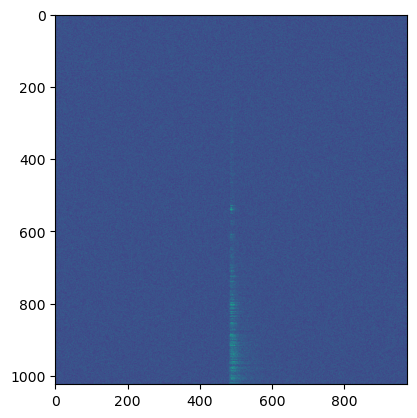

In [14]:
plt.imshow(frb_data)

### Missing some information needed for fitburst

# Fitburst time

In [19]:
# modifed Julian date (MJD)
# TODO I dont think this is correct

from datetime import datetime

# Define the Unix epoch
unix_epoch = datetime(1970, 1, 1, 0, 0, 0)

# Get the current date and time
current_datetime = datetime.utcnow()

# Calculate the difference in days
delta_days = (current_datetime - unix_epoch).total_seconds() / 86400.0

# Julian Date for the Unix epoch
JD_UNIX_EPOCH = 2440587.5

# Calculate the current Julian Date
current_jd = JD_UNIX_EPOCH + delta_days

# Convert to Modified Julian Date
current_mjd = current_jd - 2400000.5
print(current_mjd)


60492.36230175989


In [34]:
# writing a fitburst capadable data file
frb_name = 'FRB 20181209A'
frb_data = burst_data_dict[frb_name]
data_full = frb_data

metadata = {
    "bad_chans"      : [ ],  # a Python list of indices corresponding to frequency channels to zero-weight
    "freqs_bin0"     : 600,  # a floating-point scalar indicating the value of frequency bin at index 0, in MHz
    "is_dedispersed" : True, # a boolean indicating if spectrum is already dedispersed (True) or not (False)
    "num_freq"       : 1024, # an integer scalar indicating the number of frequency bins/channels
    "num_time"       : 976,  # an integer scalar indicating the number of time bins
    "times_bin0"     : current_mjd, # a floating-point scalar indicating the value of time bin at index 0, in MJD
    "res_freq"       : 800/1024, # a floating-point scalar indicating the frequency resolution, in MHz
    "res_time"       : 976/(140/1000), # a floating-point scalar indicating the time resolution, in seconds
}


# inital guess
burst_parameters = {
    "amplitude"            : [np.log(20)],# a list containing the the log (base 10) of the overall signal amplitude
    "arrival_time"         : [0], # a list containing the arrival times, in seconds
    "burst_width"          : [1/1000], # a list containing the temporal widths, in seconds
    "dm"                   : [0], # a list containing the dispersion measures (DM), in parsec per cubic centimeter
    "dm_index"             : [2],# a list containing the exponents of frequency dependence in DM delay
    "ref_freq"             : [600], # a list containing the reference frequencies for arrival-time and power-law parameter estimates, in MHz (held fixed)
    "scattering_index"     : [-2], # a list containing the exponents of frequency dependence in scatter-broadening
    "scattering_timescale" : [1], # a list containing the scattering timescales, in seconds
    "spectral_index"       : [-2], # a list containing the power-law spectral indices
    "spectral_running"     : [-2], # a list containing the power-law spectral running
}

# now write data to file.
np.savez(
    "input_data.npz", 
    data_full=data_full, 
    metadata=metadata, 
    burst_parameters=burst_parameters
)



In [41]:
# Initialize DataReader with your file
input_file = "input_data.npz"  # replace with your file path
data = DataReader(input_file)

# Load the data
data.load_data()
print(f"INFO: there are {data.num_freq} frequencies and {data.num_time} time samples.")


# Preprocess data if needed
# data.preprocess_data(normalize_variance=True, variance_range=[0.2, 0.8])

# Downsample data if needed
# data.downsample(2, 2)  # example downsampling

# Initialize model
model = SpectrumModeler(data.freqs, data.times)

# Update model parameters
initial_parameters = {
    "amplitude": [np.log10(20)],
    "arrival_time": [np.mean(data.times)],
    "burst_width": [0.05],
    "dm": [0.0],
    "dm_index": [-2.0],
    "ref_freq": [np.min(data.freqs)],
    "scattering_index": [0],
    "spectral_index": [0.0],
    "spectral_running": [0.0],
    'scattering_timescale': [1],
}
model.update_parameters(initial_parameters)

# Print model parameters to check for None values
print("Model Parameters:", model.get_parameters_dict())

# Check for None in model parameters before fitting
for param_name, param_value in model.get_parameters_dict().items():
    if any(p is None for p in param_value):
        print(f"Error: Parameter {param_name} contains None value.")
        raise ValueError(f"Parameter {param_name} contains None value.")


# Fit model
fitter = LSFitter(data.data_full, model, data.good_freq)
fitter.fix_parameter(["dm_index"])

# Proceed with fitting
try:
    fitter.fit()
except NameError as e:
    print(f"Error during fitting: {e}")
    raise


# Proceed with fitting
try:
    fitter.fit()
except NameError as e:
    print(f"Error during fitting: {e}")
    raise



# Plot results
bestfit_model = model.compute_model(data=data.data_full)
data_grouped = ut.plotting.compute_downsampled_data(
    data.times, data.freqs, data.data_full, data.good_freq,
    spectrum_model=bestfit_model, factor_freq=2, factor_time=2
)
ut.plotting.plot_summary_triptych(data_grouped, output_name="summary_plot.png", show=True)

# Save results
results = {
    "initial_dm": initial_parameters["dm"][0],
    "initial_time": data.times_bin0,
    "model_parameters": model.get_parameters_dict(),
    "fit_statistics": fitter.fit_statistics,
}
with open("results_fitburst.json", "w") as out:
    json.dump(results, out, indent=4)


INFO: there are 1024 frequencies and 976 time samples.
Model Parameters: {'amplitude': [1.3010299956639813], 'arrival_time': [3398571.4285714286], 'burst_width': [0.05], 'dm': [0.0], 'dm_index': [-2.0], 'scattering_timescale': [1], 'scattering_index': [0], 'spectral_index': [0.0], 'spectral_running': [0.0], 'ref_freq': [600.390625]}
INFO: removing the following parameters: dm_index
INFO: new list of fit parameters: amplitude, arrival_time, burst_width, dm, scattering_timescale, scattering_index, spectral_index, spectral_running

ERROR: solver encountered a failure! Debug!
Traceback (most recent call last):
  File "/home/afinemax/anaconda3/envs/astron_research_2024/lib/python3.9/site-packages/fitburst/analysis/fitter.py", line 300, in fit
    results = least_squares(
  File "/home/afinemax/anaconda3/envs/astron_research_2024/lib/python3.9/site-packages/scipy/optimize/_lsq/least_squares.py", line 861, in least_squares
    J0 = jac(x0, *args, **kwargs)
  File "/home/afinemax/anaconda3/env

TypeError: object of type 'NoneType' has no len()

INFO: there are 1024 frequencies and 976 time samples.
